In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. 한글 폰트 설정
import matplotlib as mpl
import platform

mpl.rcParams['axes.unicode_minus'] = False

current_os = platform.system()
if current_os == 'Windows':
    plt.rcParams["font.family"] = 'Malgun Gothic'
elif current_os == 'Darwin':
    plt.rcParams["font.family"] = 'AppleGothic'
else:
    plt.rcParams["font.family"] = 'NanumGothic'

In [4]:
# 2. 데이터 로드
data = pd.read_csv('../../data/school_health.csv')

## 성별에 따라 평균 BMI 지수가 다르므로, 특정 성별이 특정 수면시간대에 몰려있는 경우로 인한 해석의 왜곡이 있는지 확인해야 함
df = data[['하루수면량', 'BMI', '성별']]

# 3. 데이터 확인
print("데이터 샘플:")
print(df.head())

print("\n데이터 정보:")
print(df.info())

# 4. 기술 통계량 확인
print("\n기술 통계량:")
print(df.describe())

# 5. 결측치 확인
print("\n결측치 확인:")
print(df.isnull().sum())

# 5-1. 결측치 제거
df = df.dropna(subset=['하루수면량', 'BMI', '성별'])

데이터 샘플:
   하루수면량    BMI 성별
0    4.0  11.56  여
1    4.0  11.64  여
2    4.0  11.68  여
3    3.0  11.74  여
4    NaN  11.74  여

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92722 entries, 0 to 92721
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   하루수면량   89303 non-null  float64
 1   BMI     92722 non-null  float64
 2   성별      92722 non-null  object 
dtypes: float64(2), object(1)
memory usage: 2.1+ MB
None

기술 통계량:
              하루수면량           BMI
count  89303.000000  92722.000000
mean       2.593575     20.699823
std        1.079543      4.124897
min        1.000000     11.560000
25%        2.000000     17.620000
50%        3.000000     20.170000
75%        4.000000     23.250000
max        4.000000     34.440000

결측치 확인:
하루수면량    3419
BMI         0
성별          0
dtype: int64


In [5]:
# 6. 하루수면량 값의 분포 확인
print("\n하루수면량 값 분포:")
print(df['하루수면량'].value_counts())

# 6-1. 하루수면량 값과 대응되는 수면 시간대 매핑
sleep_time_mapping = {
    1.0: '6시간 이내',
    2.0: '6~7시간',
    3.0: '7~8시간',
    4.0: '8시간 이상'
}
df['수면시간대'] = df['하루수면량'].map(sleep_time_mapping)


하루수면량 값 분포:
하루수면량
2.0    24277
3.0    23761
4.0    23504
1.0    17761
Name: count, dtype: int64



성별 분포:
성별
남    45513
여    43790
Name: count, dtype: int64

수면시간대별 성별 분포:
수면시간대   성별
6~7시간   남     12510
        여     11767
6시간 이내  여     10119
        남      7642
7~8시간   남     12860
        여     10901
8시간 이상  남     12501
        여     11003
Name: count, dtype: int64


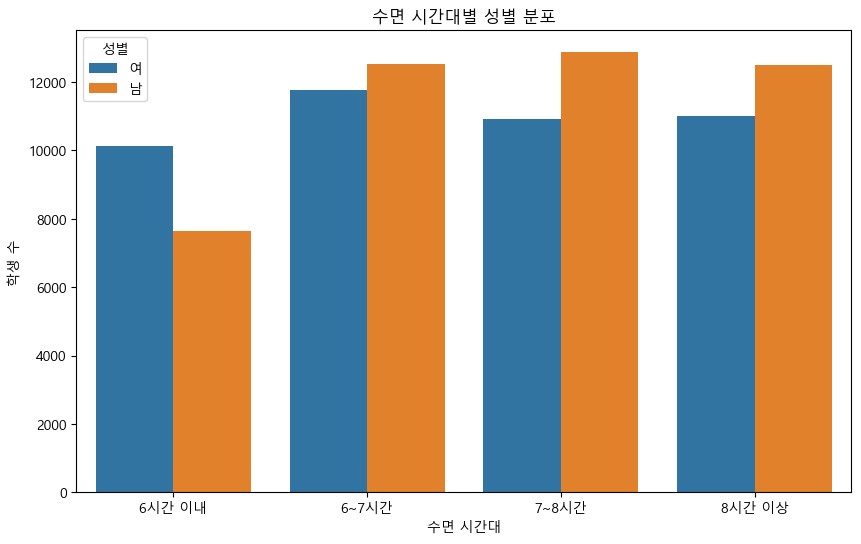

In [6]:
# 7. 성별 분포 확인
print("\n성별 분포:")
print(df['성별'].value_counts())

# 8. 수면시간대별 성별 분포 확인
print("\n수면시간대별 성별 분포:")
sleep_gender_counts = df.groupby('수면시간대')['성별'].value_counts()
print(sleep_gender_counts)

# 8-1. 수면시간대별 성별 비율 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='수면시간대', hue='성별', data=df, order=['6시간 이내', '6~7시간', '7~8시간', '8시간 이상'])
plt.title('수면 시간대별 성별 분포')
plt.xlabel('수면 시간대')
plt.ylabel('학생 수')
plt.legend(title='성별')
plt.show()

## 결과: 수면시간대별로 성별 비율이 다름

In [7]:
# 9. 수면시간대와 성별 간의 연관성 검정 (카이제곱 검정)
contingency_table = pd.crosstab(df['수면시간대'], df['성별'])
print("\n수면시간대와 성별의 교차표:")
print(contingency_table)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\n카이제곱 통계량: {chi2:.4f}")
print(f"p-value: {p}")
print(f"자유도: {dof}")
## 결과: p-value가 0.05 미만으로, 수면시간대별로 성별이 유의미하게 다르게 분포하고 있음을 확인함


수면시간대와 성별의 교차표:
성별          남      여
수면시간대               
6~7시간   12510  11767
6시간 이내   7642  10119
7~8시간   12860  10901
8시간 이상  12501  11003

카이제곱 통계량: 592.1513
p-value: 5.068458926032841e-128
자유도: 3


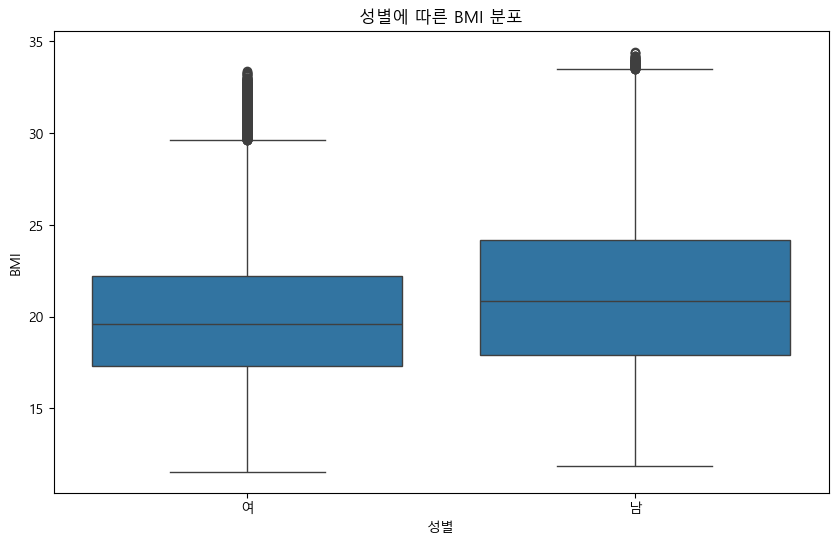

In [8]:
# 10. 성별에 따른 BMI 분포 확인
plt.figure(figsize=(10, 6))
sns.boxplot(x='성별', y='BMI', data=df)
plt.title('성별에 따른 BMI 분포')
plt.xlabel('성별')
plt.ylabel('BMI')
plt.show()
## 결과: 남성이 여성보다 평균 BMI가 더 높은 것을 확인함

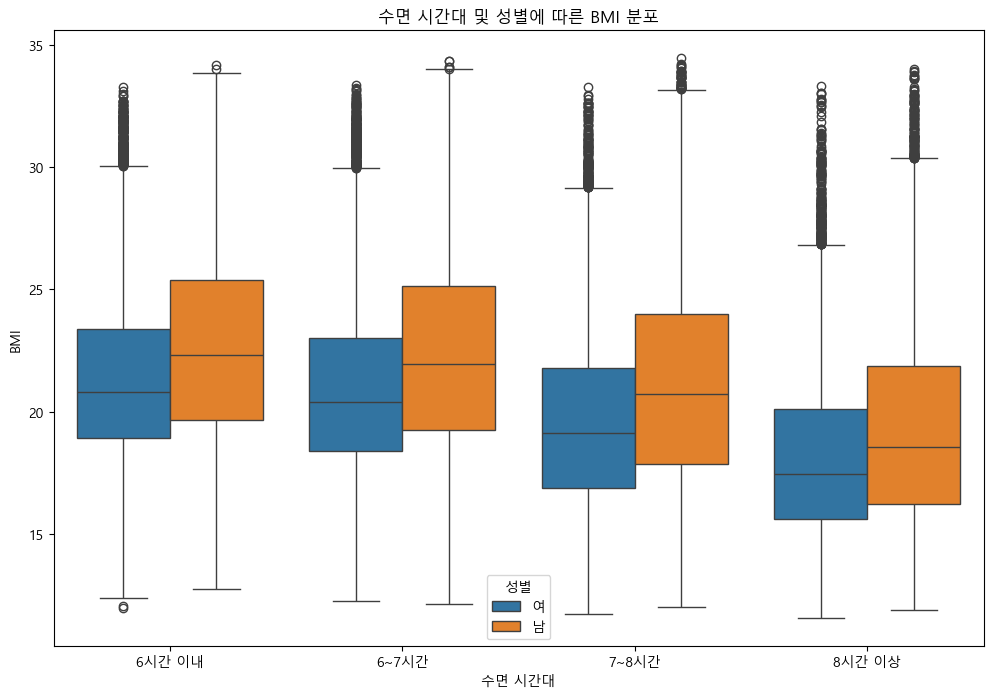

In [9]:
# 11. 수면시간대별 BMI 분포를 성별로 나누어 시각화
plt.figure(figsize=(12, 8))
sns.boxplot(x='수면시간대', y='BMI', hue='성별', data=df, order=['6시간 이내', '6~7시간', '7~8시간', '8시간 이상'])
plt.title('수면 시간대 및 성별에 따른 BMI 분포')
plt.xlabel('수면 시간대')
plt.ylabel('BMI')
plt.legend(title='성별')
plt.show()
## 결과: 범주형 변수인 수면시간대와 연속형 변수인 BMI의 분포를 파악, 수면시간이 길어질수록 BMI가 낮아지는 경향을 확인함

In [10]:
# 12. 수면 시간과 BMI의 상관관계 분석을 위한 수치형 변환
df['수면시간_수치'] = df['하루수면량'].map({
    1.0: 5.5,   # 6시간 이내를 평균 5.5시간으로 가정
    2.0: 6.5,   # 6~7시간을 평균 6.5시간으로 가정
    3.0: 7.5,   # 7~8시간을 평균 7.5시간으로 가정
    4.0: 8.5    # 8시간 이상을 평균 8.5시간으로 가정
})

c:\Users\hooni\anaconda3\envs\sda2024\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


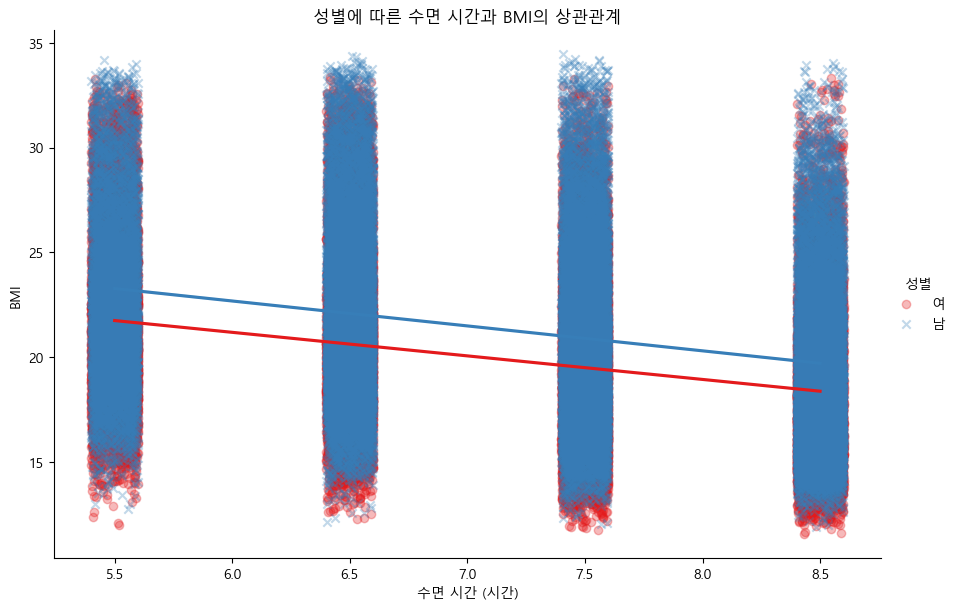

In [ ]:
# 13. 성별에 따른 수면 시간과 BMI의 상관관계 시각화
sns.lmplot(x='수면시간_수치', y='BMI', hue='성별', data=df, x_jitter=0.1, markers=['o', 'x'], palette='Set1', height=6, aspect=1.5, scatter_kws={'alpha':0.3})
plt.title('성별에 따른 수면 시간과 BMI의 상관관계')
plt.xlabel('수면 시간 (시간)')
plt.ylabel('BMI')
plt.show()
## lmplot : 두 개의 연속형 변수 간의 관계에 대한 산점도와 회귀선을 동시에 그려주어 쉽고 빠른 파악이 가능하고, 
##          성별과 같은 범주형 변수를 사용해 하나의 플롯에 그룹별로 산점도와 회귀선을 그릴 수 있음.
## 결과: 수면시간이 짧을수록 BMI가 높은 경향을 보임

In [19]:
# 14. 성별별 수면 시간과 BMI의 상관계수 계산
print("\n성별별 수면 시간과 BMI의 상관계수:")
for gender in df['성별'].unique():
    subset = df[df['성별'] == gender]
    corr = subset['수면시간_수치'].corr(subset['BMI'])
    print(f"{gender} 학생의 상관계수: {corr:.4f}")
## 결과: 남학생과 여학생 모두 수면시간이 길어질수록 BMI가 낮아지는 비슷한 수준의 음의 상관관계를 나타냄.


성별별 수면 시간과 BMI의 상관계수:
여 학생의 상관계수: -0.3269
남 학생의 상관계수: -0.2881


In [ ]:
# 15. 수면시간대별 BMI의 기술 통계량 (성별 포함)
print("\n수면시간대별 BMI 기술 통계량 (성별 포함):")
stats = df.groupby(['수면시간대', '성별'])['BMI'].describe()
print(stats)


수면시간대별 BMI 기술 통계량 (성별 포함):
             count       mean       std    min      25%    50%      75%    max
수면시간대  성별                                                                     
6~7시간  남   12510.0  22.427233  4.188617  12.14  19.2725  21.95  25.1600  34.35
       여   11767.0  20.989561  3.639044  12.29  18.4000  20.39  23.0250  33.36
6시간 이내 남    7642.0  22.736568  4.070999  12.75  19.6500  22.34  25.3775  34.18
       여   10119.0  21.421502  3.514819  11.98  18.9200  20.83  23.3700  33.27
7~8시간  남   12860.0  21.201667  4.270663  12.04  17.8800  20.71  24.0100  34.44
       여   10901.0  19.632481  3.690711  11.74  16.9000  19.13  21.8000  33.28
8시간 이상 남   12501.0  19.391343  4.000672  11.89  16.2200  18.56  21.8800  34.02
       여   11003.0  18.165702  3.406552  11.56  15.6200  17.47  20.1050  33.31
